# Polynomial Regression

Polynomial regression is a type of linear regression, known as a special case of multiple linear regression. It again makes predictions using only one independent variable, but assumes a nth degree polynomial relation between said independent variable and the dependent one.

Our assumption is also valid (just as is for linear regression) that the data that is to be predicted, is the sum of a deterministic function of the input and a random noise.

$$ r = f(x) + \epsilon $$

where r is the dependent variable, x is the independent variable and $\epsilon$ is the random noise.

Generalizing our estimator used in linear regression, we have

$$ g(x | W_k,...,W_1, W_0) = W_0 + W_1 \cdot x + ... + W_k \cdot x^k $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Creating Polynomial Data

In [28]:
num_data_points = 300
degree = 3

In [35]:
def func(x, c): 
    return sum([c[i] * x**i for i in range(len(c))])

X = np.random.uniform(-50, 50, num_data_points)
c = [np.random.uniform(-10, 10) for _ in range(degree + 1)]
y = np.array( [func(X[i], c) for i in range(num_data_points)] )

In [36]:
mu, sigma = 0, 100
noise = np.random.normal(mu, sigma, num_data_points)

y = np.add(y, noise)

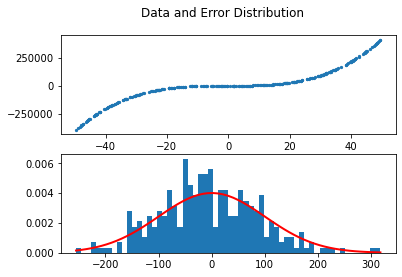

In [37]:
fig, axs = plt.subplots(2)
fig.suptitle('Data and Error Distribution')

axs[0].scatter(X, y, s = 5)

count, bins, ignored = plt.hist(noise, 60, density=True)
axs[1].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

We can show that the noise is Gaussian.

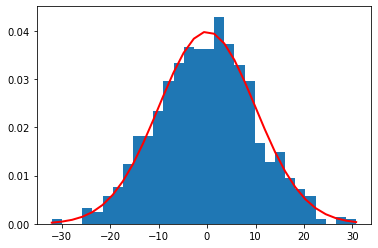

In [84]:
count, bins, ignored = plt.hist(noise, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

We can methodize data creation part to use easily later.

In [25]:
def create_poly_data(X=None, c=None, b=None, degree=3, num_points=1000, 
                     X_lower=-10, X_higher=10, c_lower=-5, c_higher=5,
                     noise=True, noise_mu=0, noise_sigma=100, plot=False):
    
    func = lambda x, c: sum([c[i] * x**i for i in range(len(c))])
    
    if X == None: X = np.random.uniform(X_lower, X_higher, num_points)
    if c == None: c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]
    
    y = np.array( [func(X[i], c) for i in range(num_points)] )
    
    if noise: 
        noise = np.random.normal(noise_mu, noise_sigma, num_points)
        y = [i + j for i, j in zip(y, noise)]
    
    if plot:
        plt.scatter(X, y, s = 5)
        plt.show()
        
    return X, c, y

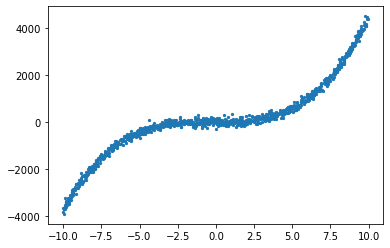

In [38]:
X, c, y = create_poly_data(degree = degree, plot = True)

### Generating Training and Validation Sets

In [232]:
x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))

Training set length: 750
Validation set length: 250


### Random Initialization of Weights

In order to update our weights, we are going to use the following equation.

$$ A \cdot W = y \Longrightarrow W = A^{-1} \cdot y $$ 

which is the same used for linear regression. Though now, we can generalize these matrices as follows.

$$ 
A = \begin{bmatrix} N & \sum x_i & ... & \sum x_i^k \\ 
    \sum x_i & \sum x_i^2 & ... & \sum x_i^{k+1} \\
    . & . & . & . \\
    . & . & . & . \\
    \sum x_i^k & ... & ... & \sum x_i^{2k}\end{bmatrix}, \quad
W = \begin{bmatrix} W_0 \\ W_1 \\ . \\ . \\ W_k \end{bmatrix}, \quad
y = \begin{bmatrix} \sum y_i \\ \sum y_i \cdot x_i \\ . \\ . \\ \sum y_i \cdot x_i^k \end{bmatrix}
$$

In [231]:
W = [np.random.random() for _ in range(degree + 1)] #+1 is for W_0

In [233]:
g = sum([W[i] * x_tr**i for i in range(len(W))])

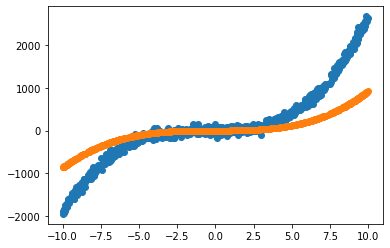

In [234]:
plt.scatter(x_tr, y_tr)
plt.scatter(x_tr, g)

### Defining Error

We are going to be using the same error that was used in linear regression, which is Relative Squared Error.

$$ E_{RSE} = \frac{\sum_{i=1}^N [r_i - g(x_i | \theta)]^2}{\sum_{i=1}^N (r_i - y)^2} $$

In [86]:
RSE = lambda y, g: sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

In [235]:
error_log, num_iter = [], 5
for _ in range(num_iter):
    #Predictions
    g = sum([W[i] * x_tr**i for i in range(len(W))])

    #Calculate error
    error = RSE(y_tr, g)
    error_log.append(error)

    #Update weights
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x_tr, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))
    
    W = np.dot(A, np.array( [ sum(y_tr * np.power(x_tr, i)) for i in range(degree+1) ] ))

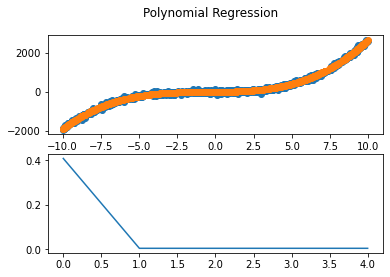

In [236]:
fig, axs = plt.subplots(2)
fig.suptitle('Polynomial Regression')

axs[0].scatter(x_tr, y_tr)
axs[0].scatter(x_tr, g)

axs[1].plot(range(num_iter), error_log)